In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from textblob import TextBlob
import spacy

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Dhruv
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Dhruv
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Dhruv
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
# reading the filre
dataset = pd.read_csv('cyberbullying/youtube_parsed_dataset.csv')

In [30]:
dataset.head()

,index,UserIndex,Text,Number of Comments,Number of Subscribers,Membership Duration,Number of Uploads,Profanity in UserID,Age,oh_label
0,0,X1,Does N.e.bodyelse Hear her Crazy ass Screamin ...,10,1,3,3,0,15,0
1,1,X2,There are so many things that are incorrect wi...,3,0,6,5,0,31,0
2,2,X3,3:26 hahah my boyfriend showed this song to me...,7,0,3,5,0,43,1
3,3,X2218,dick beyonce fuck y a ass hole you are truely ...,34,0,3,5,0,44,1
4,4,X5,DongHaeTaemin and Kai ;A; luhansehun and bacon...,11,173,5,5,0,21,0


In [31]:
dataset.columns

Index(['index', 'UserIndex', 'Text', 'Number of Comments',
       'Number of Subscribers', 'Membership Duration', 'Number of Uploads',
       'Profanity in UserID', 'Age', 'oh_label'],
      dtype='object')

In [32]:
dataset.describe()

,index,Number of Comments,Number of Subscribers,Membership Duration,Number of Uploads,Profanity in UserID,Age,oh_label
count,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000
mean,1733.021651,15.452367,304.318995,3.714781,10.288395,0.113164,24.879042,0.120381
std,1001.844201,10.862517,15520.532319,1.392837,28.646525,0.316839,13.286361,0.325454
min,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,13.000000,0.000000
25%,865.750000,6.000000,0.000000,3.000000,5.000000,0.000000,18.000000,0.000000
50%,1731.500000,14.000000,2.000000,3.000000,5.000000,0.000000,21.000000,0.000000
75%,2601.250000,23.000000,7.000000,4.000000,5.000000,0.000000,27.000000,0.000000
max,3468.000000,50.000000,912377.000000,9.000000,820.000000,1.000000,112.000000,1.000000


In [33]:
unique_values_df = dataset.apply(pd.Series.unique)
print(unique_values_df)

index                    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
UserIndex                [X1, X2, X3, X2218, X5, X6, X7, X8, X9, X10, X...
Text                     [Does N.e.bodyelse Hear her Crazy ass Screamin...
Number of Comments       [10, 3, 7, 34, 11, 12, 1, 19, 8, 6, 20, 16, 22...
Number of Subscribers    [1, 0, 173, 76, 7, 25, 171, 5, 10, 4, 2, 28, 1...
Membership Duration                               [3, 6, 5, 2, 4, 7, 8, 9]
Number of Uploads        [3, 5, 1, 2, 34, 11, 4, 18, 8, 159, 6, 23, 191...
Profanity in UserID                                                 [0, 1]
Age                      [15, 31, 43, 44, 21, 27, 23, 56, 20, 26, 22, 3...
oh_label                                                            [0, 1]
dtype: object


In [34]:
missing = dataset.isnull().sum()
print("missing values: ", missing)

missing values:  index                    0
UserIndex                0
Text                     0
Number of Comments       0
Number of Subscribers    0
Membership Duration      0
Number of Uploads        0
Profanity in UserID      0
Age                      0
oh_label                 0
dtype: int64


#### There are no missing values 


In [35]:

stop_words = set(stopwords.words('english'))


In [36]:

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stop_words]
    return tokens


In [37]:
dataset['processed_text'] = dataset['Text'].apply(preprocess_text)


In [38]:
all_tokens = [token for sublist in dataset['processed_text'] for token in sublist]


In [39]:
##Calculate word frequency
word_freq = pd.Series(all_tokens).value_counts().sort_values(ascending=False)

In [40]:
print(word_freq.head(20))

like      5151
love      3162
lol       2463
one       2340
u         2328
get       2264
people    2100
song      2087
would     2054
video     2013
good      1981
know      1858
really    1751
think     1630
3         1463
im        1429
fuck      1328
go        1316
make      1310
got       1307
Name: count, dtype: int64


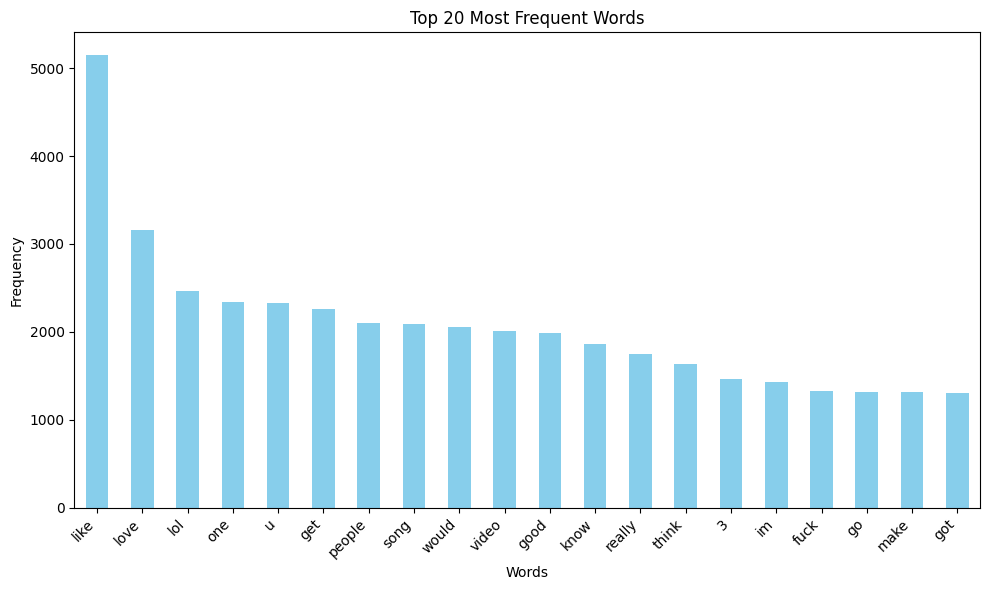

In [41]:
# Visualization of Word Frequency
plt.figure(figsize=(10, 6))
word_freq.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [43]:
# Topic Modeling using Latent Dirichlet Allocation (LDA)
# Convert text data to document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(dataset['Text'])



In [45]:
# Initialize LDA model
num_topics = 5  # Number of topics to extract
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
# Fit LDA model to the document-term matrix
lda_model.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [49]:
# Function to display topics and associated words
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

In [52]:
# Display the topics and associated words
num_top_words = 10
feature_names = vectorizer.get_feature_names_out()  # Retrieve feature names
print(f"\nTop {num_top_words} words for each topic:")
display_topics(lda_model, feature_names, num_top_words)


Top 10 words for each topic:
Topic 1:
love ur song good video amazing really ich die voice
Topic 2:
like just love lol song video know good im really
Topic 3:
que la en te el si es para se est
Topic 4:
people just like don know think god good way make
Topic 5:
like just watch make good fuck don video fucking shit


In [55]:

# Function to perform sentiment analysis on text data
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Get the sentiment polarity (-1 to 1)
    sentiment_polarity = analysis.sentiment.polarity
    # Return the sentiment polarity
    return sentiment_polarity

# Apply sentiment analysis to each text entry in the DataFrame
dataset['Sentiment_Polarity'] = dataset['Text'].apply(analyze_sentiment)

# Classify sentiment labels based on polarity values
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [57]:

# Apply sentiment label classification to each sentiment polarity
dataset['Sentiment_Label'] = dataset['Sentiment_Polarity'].apply(classify_sentiment)

# Display the DataFrame with sentiment analysis results
print(dataset[['Text', 'Sentiment_Polarity', 'Sentiment_Label']])



                                                   Text  Sentiment_Polarity  \
0     Does N.e.bodyelse Hear her Crazy ass Screamin ...           -0.040000   
1     There are so many things that are incorrect wi...           -0.110606   
2     3:26 hahah my boyfriend showed this song to me...            0.433333   
3     dick beyonce fuck y a ass hole you are truely ...           -0.186975   
4     DongHaeTaemin and Kai ;A; luhansehun and bacon...            0.482143   
...                                                 ...                 ...   
3459  She pretty I love this song I miss the old kel...            0.304464   
3460  Status-Online Im ZxkillergirlzX! I'm Zxkillerg...            0.000000   
3461  JR so cute EXO M Better I agree like yeah yeah...            0.370833   
3462                                                ! !            0.000000   
3463  great video and MERRY CHRISTMAS from greece :*...            0.332612   

     Sentiment_Label  
0           Negative  
1    

#### Finding the number of positive negative and neutral sentiments

In [59]:
# Count the occurrences of each sentiment label
sentiment_counts = dataset['Sentiment_Label'].value_counts()

# Print the counts of positive, neutral, and negative sentiments
print("Number of Positive Sentiments:", sentiment_counts.get('Positive', 0))
print("Number of Neutral Sentiments:", sentiment_counts.get('Neutral', 0))
print("Number of Negative Sentiments:", sentiment_counts.get('Negative', 0))

Number of Positive Sentiments: 2808
Number of Neutral Sentiments: 166
Number of Negative Sentiments: 490


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Preprocess the text data
# Assuming 'Text' is the column name containing text data
text_data = dataset['Text']

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit and transform the text data to TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

# Apply NMF to discover topics
num_topics = 5  # Define the number of topics
nmf_model = NMF(n_components=num_topics, random_state=42)

# Fit NMF model to the TF-IDF matrix
nmf_model.fit(tfidf_matrix)

# Display the top words for each topic
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

num_top_words = 10  # Number of top words to display for each topic
print(f"\nTop {num_top_words} words for each topic:")
display_topics(nmf_model, tfidf_vectorizer.get_feature_names(), num_top_words)

In [60]:
# # Load the spaCy English model
# nlp = spacy.load("en_core_web_sm")

# # Function to perform named entity recognition on text data
# def analyze_named_entities(text):
#     # Process the text with spaCy
#     doc = nlp(text)
#     # Extract named entities and their labels
#     named_entities = [(ent.text, ent.label_) for ent in doc.ents]
#     return named_entities

# # Sample text data
# text_data = dataset['Text']  # Assuming 'Text' is the column name containing text data

# # Apply named entity recognition to each text entry in the DataFrame
# dataset['Named_Entities'] = text_data.apply(analyze_named_entities)

# # Display the DataFrame with named entity analysis results
# print(dataset[['Text', 'Named_Entities']])

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.